In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dir = os.getcwd() + '/dataset/korean_unsmile_dataset/'
train_data_file = 'unsmile_train_v1.0.tsv'
test_data_file = 'unsmile_valid_v1.0.tsv'

In [54]:
# number of original train and test data
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
train_df = pd.read_csv(data_dir + train_data_file, sep='\t')
test_df = pd.read_csv(data_dir + test_data_file, sep='\t')
print(f'number of original train data: {len(train_df)}')
print(f'number of original test data: {len(test_df)}')

number of original train data: 15005
number of original test data: 3737


In [57]:
# concatenate train and test data
merged_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print(f'number of data in merged dataframe, {len(merged_df)}')

# remove data without label
indexes = []
for i in range(len(merged_df)):
    data = merged_df.iloc[i]
    if data[1:].sum() == 0:
        indexes.append(i)

merged_df.drop(indexes, inplace=True)
merged_df.reset_index(drop=True, inplace=True)
print(f'after removing not labeled data, {len(merged_df)}')
# merged_df.tail()

number of data in merged dataframe, 18742
after removing not labeled data, 18740


In [48]:
revise_df = pd.read_table('./re-labeling.txt', sep='\s+', header=None, names=['index', 'label'])
print(f'the number of re-labeled data: {len(revise_df)}')
revise_df.head()

the number of re-labeled data: 119


,index,label
0,6495,1
1,7188,1
2,6088,1
3,13751,1
4,18417,1


In [49]:
categories = merged_df.columns[1:].to_list()
to_category = {}

for i in range(len(categories)):
    to_category[i] = categories[i]

to_category

{0: '여성/가족',
 1: '남성',
 2: '성소수자',
 3: '인종/국적',
 4: '연령',
 5: '지역',
 6: '종교',
 7: '기타 혐오',
 8: '악플/욕설',
 9: 'clean',
 10: '개인지칭'}

In [60]:
indexes = revise_df['index'].values
labels = revise_df['label'].values

# one hot re-labeling
for i, label in zip(indexes, labels):
    for key in to_category:
        if key == label:
            merged_df.loc[i, to_category[key]] = 1
        else:
            merged_df.loc[i, to_category[key]] = 0

In [62]:
boundary = 15003
processed_train_df = merged_df.iloc[:boundary]
processed_test_df = merged_df.iloc[boundary:]
# print(processed_train_df.sum()[1:])
# print()
# print(train_df.sum()[1:])

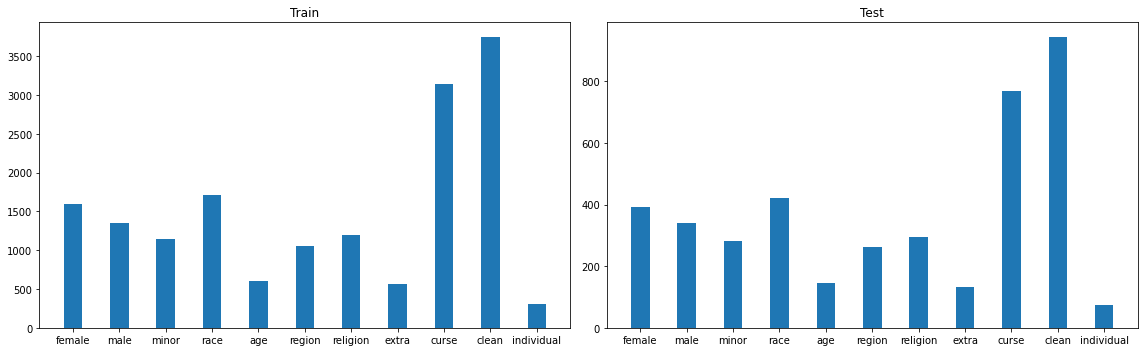

-train
여성/가족   남성   성소수자   인종/국적   연령   지역   종교   기타 혐오   악플/욕설   clean   개인지칭   
1591    1352    1140    1718    604    1050    1195    562    3139    3750    312    
-test
여성/가족   남성   성소수자   인종/국적   연령   지역   종교   기타 혐오   악플/욕설   clean   개인지칭   
393     340     281     422     146     261     294     134     770     944     74     

In [63]:
# data distribution after cleaning
categories = ['female', 'male', 'minor', 'race', 'age', 'region', 'religion', 'extra', 'curse', 'clean', 'individual']

train_sum = processed_train_df.sum()[1:]
x1 = range(1, 2 * len(train_sum), 2)
y1 = train_sum

test_sum = processed_test_df.sum()[1:]
x2 = range(1, 2 * len(test_sum), 2)
y2 = test_sum

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.title('Train')
plt.xticks(x1, categories)

plt.subplot(1, 2, 2)
plt.bar(x2, y2)
plt.title('Test')
plt.xticks(x2, categories)

plt.tight_layout()
plt.show()

print('-train')
for i in y1.index:
  print(f'{i}   ', end='')
print()
for i in y1:
  print(f'{i}    ', end='')

print()

print('-test')
for i in y2.index:
  print(f'{i}   ', end='')
print()
for i in y2:
  print(f'{i}     ', end='')

In [64]:
# save re-labeled data
processed_train_df.to_csv(data_dir + 'processed_unsmile_train_v1.0.tsv', sep='\t', header=True, index=False)
processed_test_df.to_csv(data_dir + 'processed_unsmile_valid_v1.0.tsv', sep='\t', header=True, index=False)